# Clustering

In [1]:
# Suppress Warnings:
import warnings
warnings.filterwarnings('ignore')

# Importing data wrangling libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Sklearn libraries:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Importing Clustering libraries:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Reading Data:

In [2]:
# Reading the dataset:
df = pd.read_csv('Country-data.csv', header=0)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Checking number of rows and columns:
df.shape

(167, 10)

In [4]:
# Checking null values and data type:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


- There are no null values are to be seen and also, all the data types are correct.

In [5]:
# Creating absolute values of percentage:
df['exports'] = df['exports'] * df['gdpp']/100
df['health'] = df['health'] * df['gdpp']/100
df['imports'] = df['imports'] * df['gdpp']/100
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [6]:
# Adding index column:
df['ID'] = df.index+10  

- This will help to easily identify the country when the country column will be dropped.

In [7]:
# Checking ID column:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,10
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,11
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,12
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,13
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,14


### Outlier Analysis:

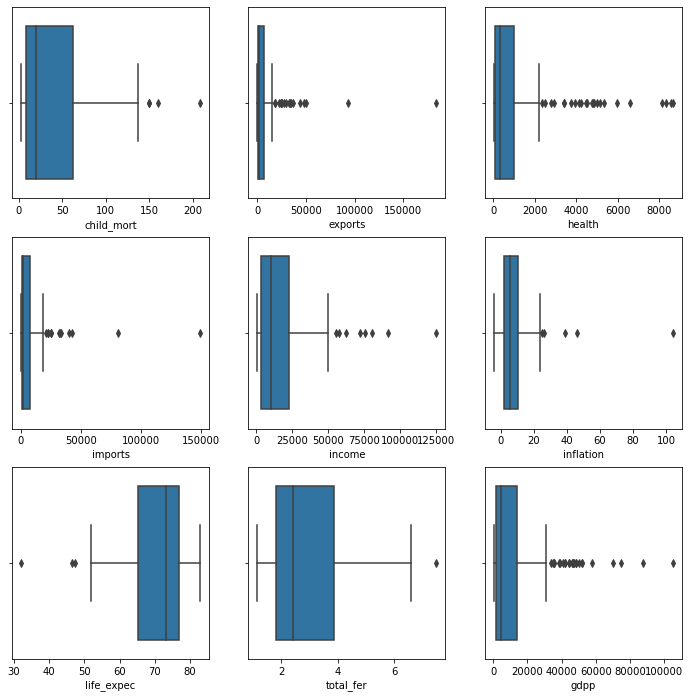

In [8]:
# Plotting all variables to check outliers:
plt.figure(figsize=(12,12))
feature = df.columns[1:-1]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(df[i[1]])

- We need to cap upper limit of gdpp, exports, imports, health, income and life_expec.
- whereas lower limit of child_mort, total_fer and inflation.

### Capping:

In [9]:
# Capping of variables:
up = ['gdpp', 'exports', 'imports', 'health', 'income', 'life_expec'] # List of variables whose upper limit is to be capped.
down = ['child_mort','total_fer','inflation'] # List of variables whose lower limit is to be capped.

for x in up:  
    q=df[x].quantile(0.99) 
    
    df[x][df[x]>=q]=q # Capping of upper limit
    
for x in down:
    q=df[x].quantile(0.01)
    
    df[x][df[x]<=q]=q # Capping of lower limit

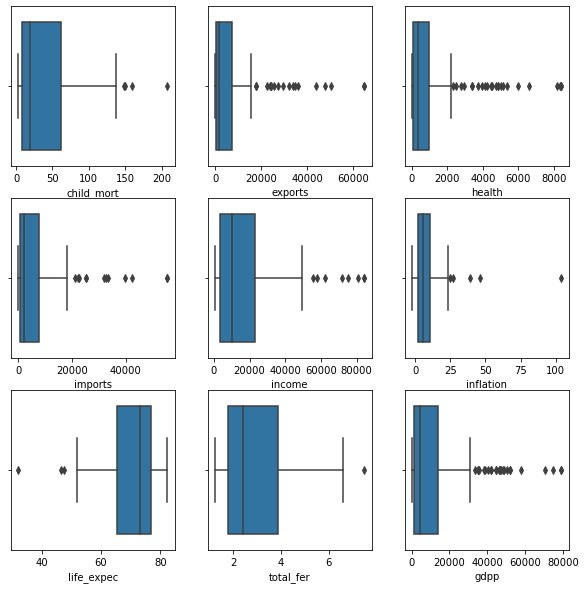

In [10]:
# Checking outliers after capping:
plt.figure(figsize=(10,10))
feature = df.columns[1:-1]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(df[i[1]])

### EDA:

### Bivariate Analysis:

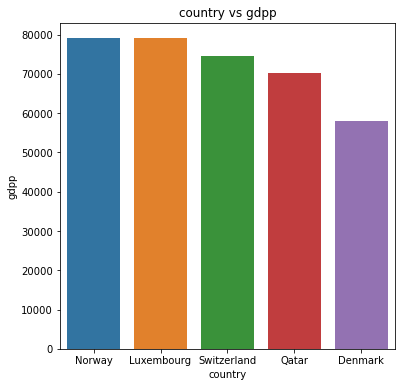

In [11]:
# Top five countries with highest GDP: 
plt.figure(figsize=(6,6))
plt.title(label='country vs gdpp')
high_gdp=df.sort_values(by='gdpp', ascending=False).head(5)
sns.barplot(x='country',y='gdpp', data= high_gdp)
plt.show()

- One can tell from the above graph that, Norway and luxemberg have highest and almost same GDP per capita.
- and the top 5 countries with highest GDP per capita are, Norway, Luxemberg, Switzerland, Qatar and Denmark.

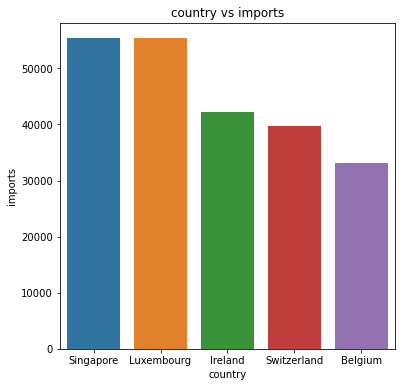

In [12]:
# Top five countries with high imports: 
plt.figure(figsize=(6,6))
plt.title(label='country vs imports')
high_exp=df.sort_values(by='imports', ascending=False).head(5)
sns.barplot(x='country',y='imports', data= high_exp)
plt.show()

- Top 5 countries with highest imports are Singapore, Luxembourg, Ireland, Switzerland, Belgium.

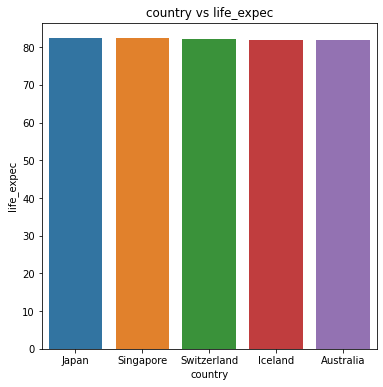

In [13]:
# Top five countries with high life_expec: 
plt.figure(figsize=(6,6))
plt.title(label='country vs life_expec')
high_life=df.sort_values(by='life_expec', ascending=False).head(5)
sns.barplot(x='country',y='life_expec', data= high_life)
plt.show()

- Top 5 countries with highest life expentancy are: Japan, Singapore, Switzerland, Iceland, Australia.

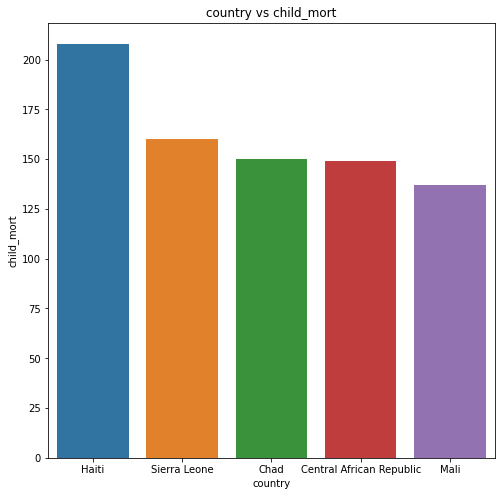

In [14]:
# Top five countries with high child_mort: 
plt.figure(figsize=(8,8))
plt.title(label='country vs child_mort')
child_mor=df.sort_values(by='child_mort', ascending=False).head(5)
sns.barplot(x='country',y='child_mort', data= child_mor)
plt.show()

- Top 5 countries with highest child mortality are: Haiti, Sierra Leone, Chad, Central African Republic and, Mali.

### Multivariate Analysis:

In [15]:
# Country with low income, low gdp and high child mortality rate:
df.sort_values(by=['income', 'gdpp','child_mort'], ascending = [True, True, False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,47
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,98
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0,36
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,122
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,41


- The countries with low income, low gdp and high child mortality rate are:
    1. Congo, Dem. Rep.
    2. Liberia
    3. Burundi
    4. Niger
    5. Central African Republic

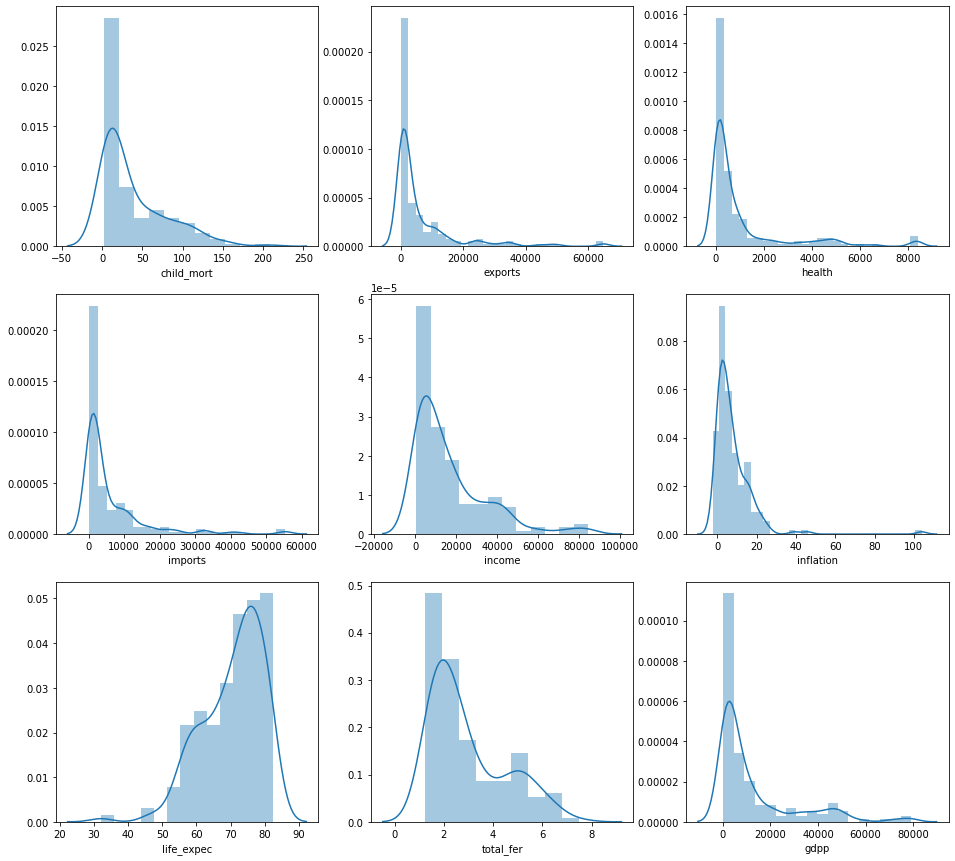

In [16]:
# Visualising distribution for variables:
plt.figure(figsize=(16,15))
feature = df.columns[1:-1]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.distplot(df[i[1]])
    

- By seeing the above distribution one can infer that at least two and at most three clusters should be made.

### Model building:

In [17]:
# Copying name of countries before dropping.
country = df.country.copy()

In [18]:
# Dropping country column from the table:
df.drop(labels='country', axis=1, inplace=True)

### Hopkis Score

In [19]:
# Calculating the Hopkins statistic
# Importing new library of K nearest neighbours, for uniform distribution comparision.
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [20]:
# Hopkins score:
hopkins(df.drop('ID', axis = 1))

0.921827364438932

- If hopkins score is greater than 70 that means this data set is feasible for clustering.

### Scaling on data:

In [21]:
# Importing libraries
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # using standard scaler creating an instant
df1 = scaler.fit_transform(df.drop('ID', axis = 1)) # performing Fit transform and dropping 'ID' column.
df1

array([[ 1.29153663, -0.56962212, -0.56695778, ..., -1.61970522,
         1.90339023, -0.70225949],
       [-0.53899289, -0.47385792, -0.4403934 , ...,  0.64883094,
        -0.86081558, -0.49872564],
       [-0.27286971, -0.42399973, -0.48627082, ...,  0.67140344,
        -0.03884551, -0.47743428],
       ...,
       [-0.37235501, -0.49160668, -0.54024972, ...,  0.28767096,
        -0.66195186, -0.65869853],
       [ 0.44839871, -0.53995007, -0.55242911, ..., -0.34435902,
         1.14107928, -0.65869853],
       [ 1.11495022, -0.52701632, -0.54227159, ..., -2.09372771,
         1.62498101, -0.6500669 ]])

In [22]:
# Converted array to dataframe:
df1 = pd.DataFrame(df1, columns = df.columns[:-1])
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291537,-0.569622,-0.566958,-0.598741,-0.851668,0.156035,-1.619705,1.903390,-0.702259
1,-0.538993,-0.473858,-0.440393,-0.413584,-0.386946,-0.314406,0.648831,-0.860816,-0.498726
2,-0.272870,-0.424000,-0.486271,-0.476100,-0.221053,0.788991,0.671403,-0.038846,-0.477434
3,2.007831,-0.381249,-0.534088,-0.463973,-0.612045,1.387733,-1.179541,2.128769,-0.530950
4,-0.695682,-0.086742,-0.178410,0.139728,0.125254,-0.604273,0.705262,-0.542634,-0.032042


### K-Mean Clustering

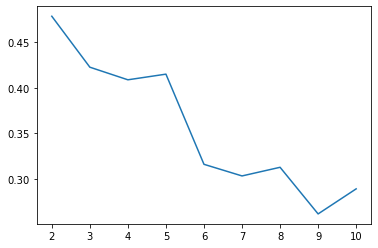

In [23]:
# Silhouette score
# Calculating Silhouette score:
from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmean.labels_)])
temp = pd.DataFrame(ss)  

# Plotting Silhouette score:
plt.plot(temp[0], temp[1])
plt.show()

- The Silhouette score is highest at 2 and second highest is at 3, 
we should take number of clusters as 3, instead of 2.

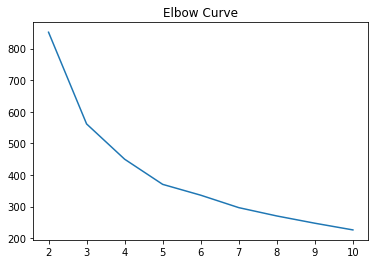

In [24]:
# Elbow curve SSD: 
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ssd.append([k, kmean.inertia_])

# Plotting Elbow curve: 

plt.title(label='Elbow Curve')
temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1])

- The elbow can be seen at 3, hence we take K=3

In [25]:
# Setting Kmeans clusters to 3: 
kmean = KMeans(n_clusters = 3, random_state = 50)

# Fitting on df1
kmean.fit(df1)

KMeans(n_clusters=3, random_state=50)

In [26]:
# Copying the data
kmean_df = df.copy()

In [27]:
# Generating kmean labels:
label  = pd.DataFrame(kmean.labels_, columns= ['label'])
label.head()

,label
0,2
1,0
2,0
3,2
4,0


In [28]:
# Adding label column to dataframe:
kmean_df = pd.concat([kmean_df, label, country], axis =1)
kmean_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,label,country
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,10,2,Afghanistan
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,11,0,Albania
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,12,0,Algeria
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,13,2,Angola
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,14,0,Antigua and Barbuda


In [29]:
# Checking value counts in all clusters:
kmean_df.label.value_counts()

0    92
2    48
1    27
Name: label, dtype: int64

- Label 0 has 92 countries
- label 1 has 27 and
- label 2 has 48 countries

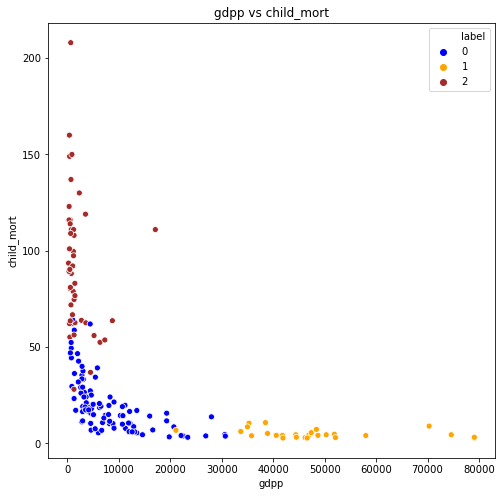

In [30]:
# plotting the cluster gdpp vs child_mort:
plt.figure(figsize=(8,8))
plt.title(label='gdpp vs child_mort')
sns.scatterplot( data = kmean_df, x = 'gdpp', y = 'child_mort', hue = 'label', palette=['blue','orange','brown'])
plt.show()

- From above graph it can be seen that,there are three clusters:
    1. at low GDP and low child mortality = Blue color [label = 0]
    2. at low GDP and high child mortality = Brown color [label = 2]
    3. at high gdp and higher child mortality rate = Orange color [label = 1].

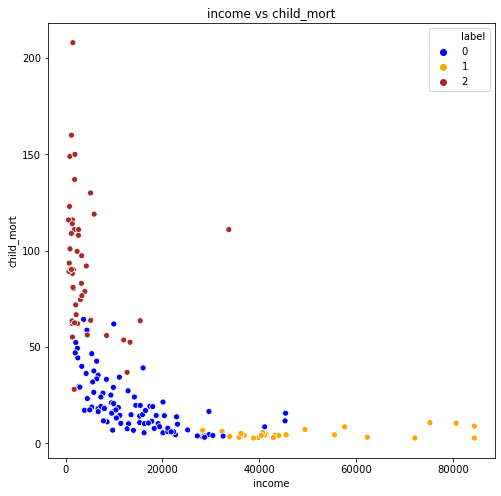

In [31]:
# Plotting the cluster income vs child_mort:
plt.figure(figsize=(8,8))
plt.title(label='income vs child_mort')
sns.scatterplot(x = 'income', y = 'child_mort', hue = 'label', data = kmean_df, palette=['blue','orange','brown'])
plt.show()

- From above graph it can be seen that, there are three clusters:
    1. at low income and low child mortality = Blue color [label = 0]
    2. at low income and high child mortality = Brown color [label = 2]
    3. at high income and higher child mortality rate = Orange color [label = 1].

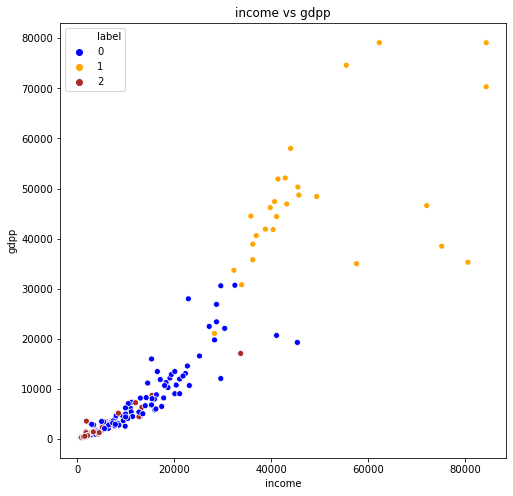

In [32]:
# Plotting the cluster income vs gdpp:
plt.figure(figsize=(8,8))
plt.title(label='income vs gdpp')
sns.scatterplot(x = 'income', y = 'gdpp', hue = 'label', data = kmean_df, palette=['blue','orange','brown'])
plt.show()

- From above graph it can be seen that there are three clusters, and there is a linear relationship between income and GDPP, which is obvious.

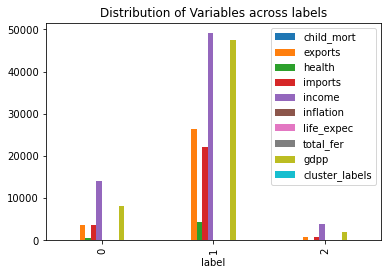

In [59]:
# Visualising Distribution of Variables across labels:
kmean_df.drop('ID', axis = 1).groupby('label').mean().plot(kind = 'bar')
plt.title(label='Distribution of Variables across labels')
plt.show()

- From above plot it can be seen that, 
   - label-0: Is the cluster of countries that have lowest GDP, income a highest Child mortality. 
   - label-1: Is the cluster of countries that have higher GDP, income a lower Child mortality.
   - label-2: Is the cluster of countries that have lower GDP, income a higher Child mortality. 

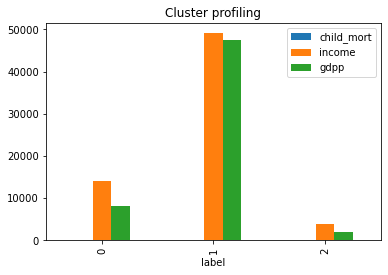

In [34]:
# Cluster Profiling for 'child_mort', 'income' and 'gdpp':
kmean_df.drop(['ID', 'exports','health','imports','inflation','life_expec','total_fer'], axis = 1).groupby('label').mean().plot(kind = 'bar')
plt.title(label='Cluster profiling')
plt.show()

- It can be seen that label 2 has the least income and gdpp with highest child_mort. 
so we consider only those countries which are under this label.

In [35]:
# Getting top 10 countries from label 2 which is having low income, low gdpp and high child_mort rate:
df2= kmean_df[kmean_df['label'] == 2].sort_values(by = ['income', 'gdpp','child_mort'], ascending = [True, True, False])
df2.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,label,country
37,116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,47,2,"Congo, Dem. Rep."
88,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,98,2,Liberia
26,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0,36,2,Burundi
112,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,122,2,Niger
31,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,41,2,Central African Republic
106,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419.0,116,2,Mozambique
94,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.31,459.0,104,2,Malawi
63,109.0,196.3440,31.9464,279.936,1190.0,16.10,58.0,5.34,648.0,73,2,Guinea
150,90.3,196.1760,37.3320,279.624,1210.0,1.18,58.7,4.87,488.0,160,2,Togo
132,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,142,2,Sierra Leone


In [36]:
# Getting top 5 countries which are in need of help:
top5 = df2.country.head()
top5.tolist()

['Congo, Dem. Rep.', 'Liberia', 'Burundi', 'Niger', 'Central African Republic']

- The countries which are in need of help are:
    1. Congo, Dem. Rep.
    2. Liberia
    3. Burundi
    4. Niger
    5. Central African Republic

## Hierarchical Clustering

In [37]:
# Checking head of scalled dataframe:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291537,-0.569622,-0.566958,-0.598741,-0.851668,0.156035,-1.619705,1.903390,-0.702259
1,-0.538993,-0.473858,-0.440393,-0.413584,-0.386946,-0.314406,0.648831,-0.860816,-0.498726
2,-0.272870,-0.424000,-0.486271,-0.476100,-0.221053,0.788991,0.671403,-0.038846,-0.477434
3,2.007831,-0.381249,-0.534088,-0.463973,-0.612045,1.387733,-1.179541,2.128769,-0.530950
4,-0.695682,-0.086742,-0.178410,0.139728,0.125254,-0.604273,0.705262,-0.542634,-0.032042


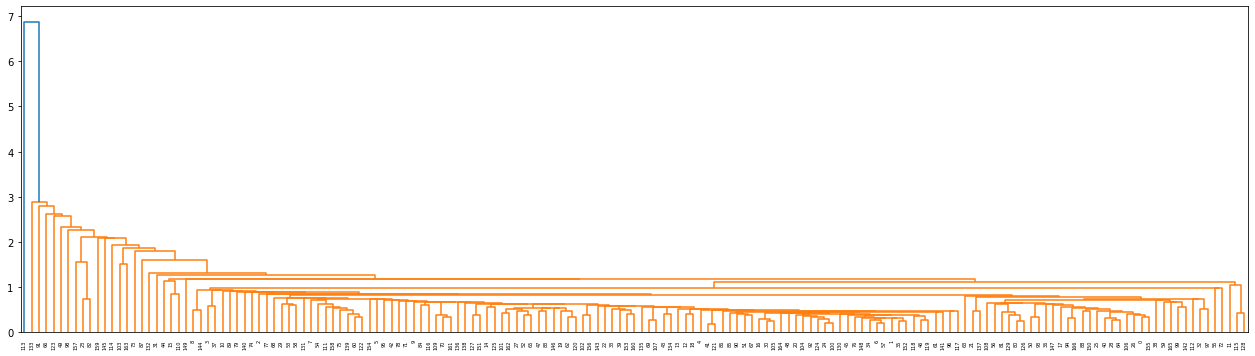

In [38]:
# Checking for Single linkage:
plt.figure(figsize=(22,6))
mergings = linkage(df1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

- For better results we should use Complete linkage.

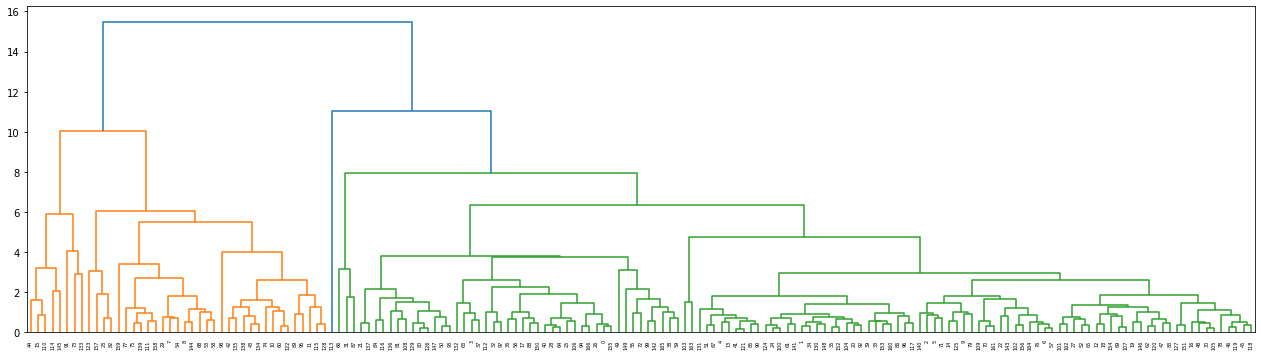

In [39]:
# Checking complete linkage:
plt.figure(figsize=(22,6))
mergings = linkage(df1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

- From above figure, let's select cluster = 3. 

In [40]:
# Creating 3 clusters:
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [41]:
# Assigning cluster_labels to dataframe:
kmean_df['cluster_labels'] = cluster_labels
kmean_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,label,country,cluster_labels
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,10,2,Afghanistan,0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,11,0,Albania,0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,12,0,Algeria,0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,13,2,Angola,0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,14,0,Antigua and Barbuda,0


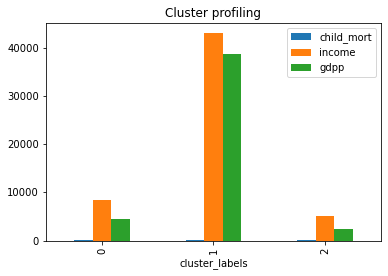

In [42]:
# Cluster Profiling for 'child_mort', 'income' and 'gdpp':
kmean_df.drop(['ID', 'exports','health','imports','inflation','life_expec','total_fer','label'], axis = 1).groupby('cluster_labels').mean().plot.bar()
plt.title(label='Cluster profiling')
plt.show()

- It can be seen that label 2 has the least income and gdpp with highest child_mort. 
so we consider only those countries which are under this label.

In [44]:
# Getting top 10 countries from cluster_labels 0 which is having low income, low gdpp and high child_mort rate:
df3 = kmean_df[kmean_df['cluster_labels'] == 2].sort_values(by = ['income', 'gdpp','child_mort'], ascending = [True, True, False])
df3.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,label,country,cluster_labels
113,130.0,589.49,118.131,405.42,5150.0,104.0,60.5,5.84,2330.0,123,2,Nigeria,2


In [45]:
# getting top 5 countries in Hierarchical Clustering:
top5_hir = df3.country.head()
top5_hir.tolist()

['Nigeria']

In [46]:
# checking cluster value counts:
kmean_df.cluster_labels.value_counts()

0    125
1     41
2      1
Name: cluster_labels, dtype: int64

##### As it can be seen in the above there is only one country in cluster no. 2, hence we are setting cluster = 2

#### Setting clusters = 2

In [47]:
# Creating 2 clusters:
cluster_labels = cut_tree(mergings, n_clusters=2).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [48]:
# Assigning cluster_labels to dataframe:
kmean_df['cluster_labels'] = cluster_labels
kmean_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,label,country,cluster_labels
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,10,2,Afghanistan,0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,11,0,Albania,0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,12,0,Algeria,0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,13,2,Angola,0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,14,0,Antigua and Barbuda,0


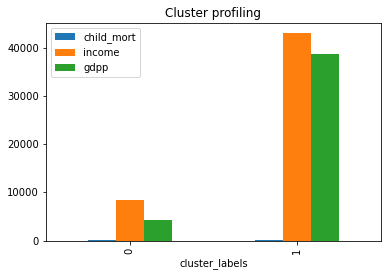

In [49]:
# Cluster Profiling for 'child_mort', 'income' and 'gdpp':
kmean_df.drop(['ID', 'exports','health','imports','inflation','life_expec','total_fer','label'], axis = 1).groupby('cluster_labels').mean().plot.bar()
plt.title(label='Cluster profiling')
plt.show()

- It can be seen that label 0 has the least income and gdpp with highest child_mort. so we consider only those countries which are under this label.

In [50]:
# checking cluster value counts:
kmean_df.cluster_labels.value_counts()

0    126
1     41
Name: cluster_labels, dtype: int64

In [55]:
# Getting top 10 countries from cluster_labels 0 which is having low income, low gdpp and high child_mort rate:
df4 = kmean_df[kmean_df['cluster_labels'] == 0].sort_values(by = ['income', 'gdpp','child_mort'], ascending = [True, True, False])
df4.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,label,country,cluster_labels
37,116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,47,2,"Congo, Dem. Rep.",0
88,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,98,2,Liberia,0
26,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0,36,2,Burundi,0
112,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,122,2,Niger,0
31,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,41,2,Central African Republic,0
106,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419.0,116,2,Mozambique,0
94,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.31,459.0,104,2,Malawi,0
63,109.0,196.3440,31.9464,279.936,1190.0,16.10,58.0,5.34,648.0,73,2,Guinea,0
150,90.3,196.1760,37.3320,279.624,1210.0,1.18,58.7,4.87,488.0,160,2,Togo,0
132,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,142,2,Sierra Leone,0


In [52]:
# getting top 5 countries in Hierarchical Clustering:
top5_hir = df4.country.head()
top5_hir.tolist()

['Congo, Dem. Rep.', 'Liberia', 'Burundi', 'Niger', 'Central African Republic']

- The countries which are in need of help are:
    1. Congo, Dem. Rep.
    2. Liberia
    3. Burundi
    4. Niger
    5. Central African Republic

## Conclusion:

- The countries which are in dire need of help are:
    1. Congo, Dem. Rep.
    2. Liberia
    3. Burundi
    4. Niger and
    5. Central African Republic

These countries are having lowest GDP per capita, net income per person and also highest Child Mortality rate.

- The KMean clustering method showed better results compared to Hierarchical clustering method as it generated 3 clusters with decent amount of countries in each cluster.

- Whereas the Hierarchical clustering, clustered only one country in cluster number 2 when we assigned clusters=3, owing to which we finally made two clusters in Hierarchical clustering.


#### Interesting insights from EDA
- From EDA we can conclude that, Switzerland is the country which is in top 5 list of highest GDP per Capita, and also has high life expectancy.
So it is one of the best county to live in.